# Basic Descriptive Text Analytics Visualization
---

Using the 2016 presidential debates dataset <br>
https://www.kaggle.com/mrisdal/2016-us-presidential-debates/data

> We are going to start with reviewing some basic visualization of word frequency. In order to do this we will have to load, clean and preprocess data. Once this is done we can visualize basic word frequency.  

### Import Packages

In [3]:
#CSV
import csv
from collections import Counter

#pandas
import pandas as pd

#Matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

#numpy
import numpy as np

# nltk
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#regular expression
import re

#seaborn
import seaborn as sns

#### Loading and preparing the data

In [4]:
#Use pandas to load csv into dataframe (df)
df = pd.read_csv("data/debate.csv", encoding = 'iso-8859-1')
df.head(1)

,Line,Speaker,Text,Date
0,1,Holt,Good evening from Hofstra University in Hempst...,9/26/2016


##### We only want the data from Trump and Clinton

In [5]:
#remove the line and date columns, we do not need them. 
del df['Line']
del df['Date']

#create seperate dataframes for trump and clinton. 
df_clinton = df[df.Speaker=="Clinton"].copy()
df_trump = df[df.Speaker=="Trump"].copy()

#now we can drop the speaker column from each
df_trump = df_trump.drop('Speaker', axis=1)
df_clinton = df_clinton.drop('Speaker', axis=1)

##### Transform Clinton and Trump data from dataframe to list

In [6]:
#use .values.tolist() to transform dataframe into list
clinton = df_clinton.values.tolist()
trump = df_trump.values.tolist()

#### Tokenization and Data Preprocessing
> Convert to string, make all characters lowercase, get rid of non alpha-numeric characters, tokenize words, remove stopwords, remove short words, create frequency distribution using nltk.

In [7]:
tokens = str(trump)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
more_stopwords = set(('will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
trump_tokens = (word for word in tokens if len(word) >= 3)
fdist_trump = nltk.FreqDist(trump_tokens) 

In [8]:
tokens = str(clinton)
tokens = tokens.lower()
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens = word_tokenize(tokens)
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
more_stopwords = set(('will', 'people', 'need', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens = (word for word in tokens if word.isalpha())
clinton_tokens = (word for word in tokens if len(word) >= 3)
fdist_clinton = nltk.FreqDist(clinton_tokens) 

#### Lets Plot the Word Frequency for Trump and Clinton using matplot lib.  
>This is a very simple method to plot the frequency distributions that we created above. The words are plotted on the X axis and the frequency is plotted on the Y axis. In these graphs we only show the top 30 words for each candidate to improve readability. Trump is on the top, Clinton is on the bottom. 

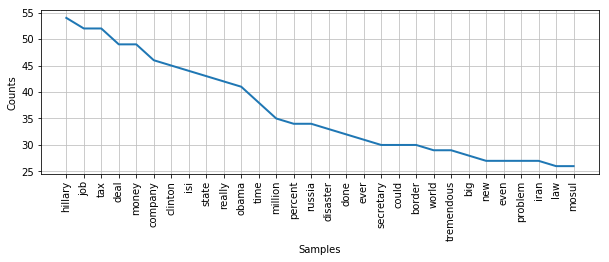

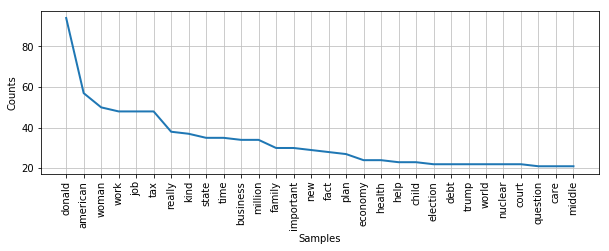

In [9]:
plt.figure(figsize=(10,3))
fdist_trump.plot(30)

plt.figure(figsize=(10,3))
fdist_clinton.plot(30)

### These work, but we can build much better looking and easier to understand charts with seaborn. 
> First,  we need to reformat the data to meet our needs. Seaborn makes it easy to use data frames, so we are going to combine the freqency lists into one dataframe. 

##### Convert frequency distributions into dataframes

In [10]:
freq_word_clinton = []
# two values or columns in fdist_a
for k,v in fdist_clinton.items():
    freq_word_clinton.append([k,v, 'Clinton'])
#make it like an Excel worksheet
wordlist_clinton = pd.DataFrame(freq_word_clinton)

In [11]:
freq_word_trump = []
# two values or columns in fdist_a
for k,v in fdist_trump.items():
    freq_word_trump.append([k,v, 'Trump'])
#make it like an Excel worksheet
wordlist_trump = pd.DataFrame(freq_word_trump)

##### Combine the two frequency distributions into one dataframe

In [12]:
df3 = wordlist_clinton.append(wordlist_trump)
df3 = df3.rename(columns={0: 'word', 1: 'freq', 2: 'speaker'})
df4 = df3.sort_values(by=['freq'], ascending=False).head(40)

In [13]:
df4 = df3.sort_values(by=['freq'], ascending=False).head(30)

# Seaborn Visualization

Using seaborn we can show both canidates word frequency on a single chart. We will use factorplot to do this.<br> https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot
>* Set our X values to frequency
* Set our Y values to word

>* We want a bar chart (kind = bar)
* We want a horizontal orientation (orient = h)

>* We can also set colors to represent categories
 * Trump: Red (Republican Party Color)
 * Clinton: Blue (Democratic Party Color)
 * palette=dict(Trump = "#D65F5F", Clinton = "#4878CF")

In [14]:
import seaborn as sns

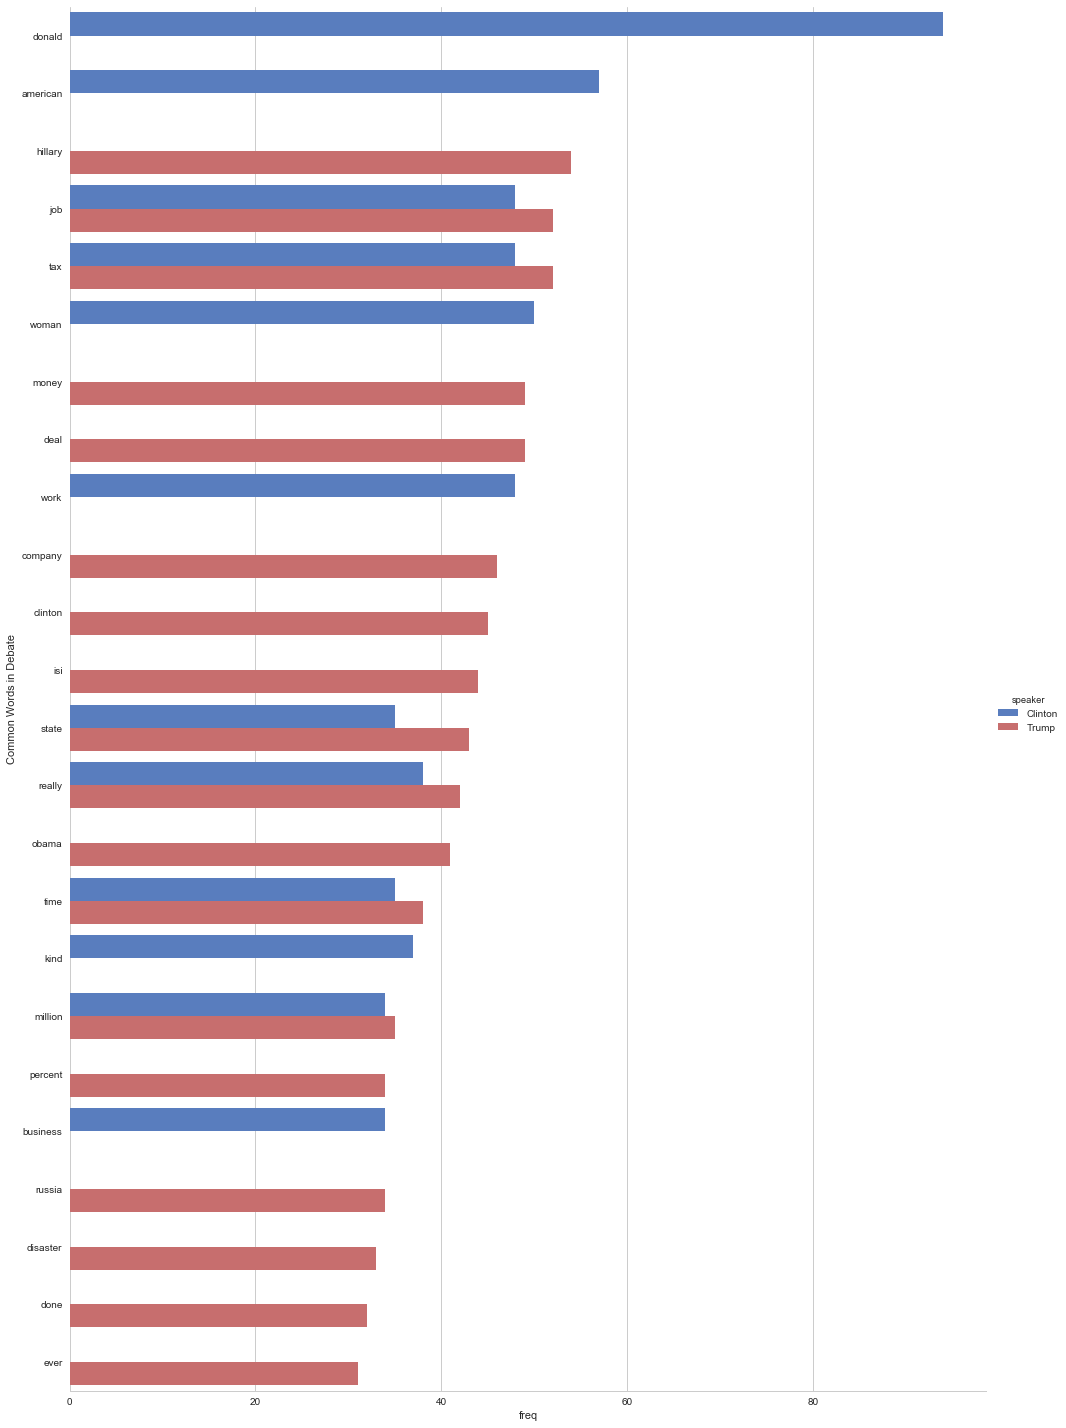

In [15]:
sns.set(style="whitegrid")

sns.color_palette(palette=None, n_colors=None, desat=None)

g = sns.factorplot(x="freq", y="word", hue="speaker", data=df4,
                   size=20, kind="bar", aspect=.7,
                   palette=dict(Trump = "#D65F5F", Clinton = "#4878CF"), orient="h")
g.despine(left=True)
g.set_ylabels("Common Words in Debate")

#### We can adapt this into a factor plot easily. 

In [16]:
df4 = df3.sort_values(by=['freq'], ascending=False).head(30)

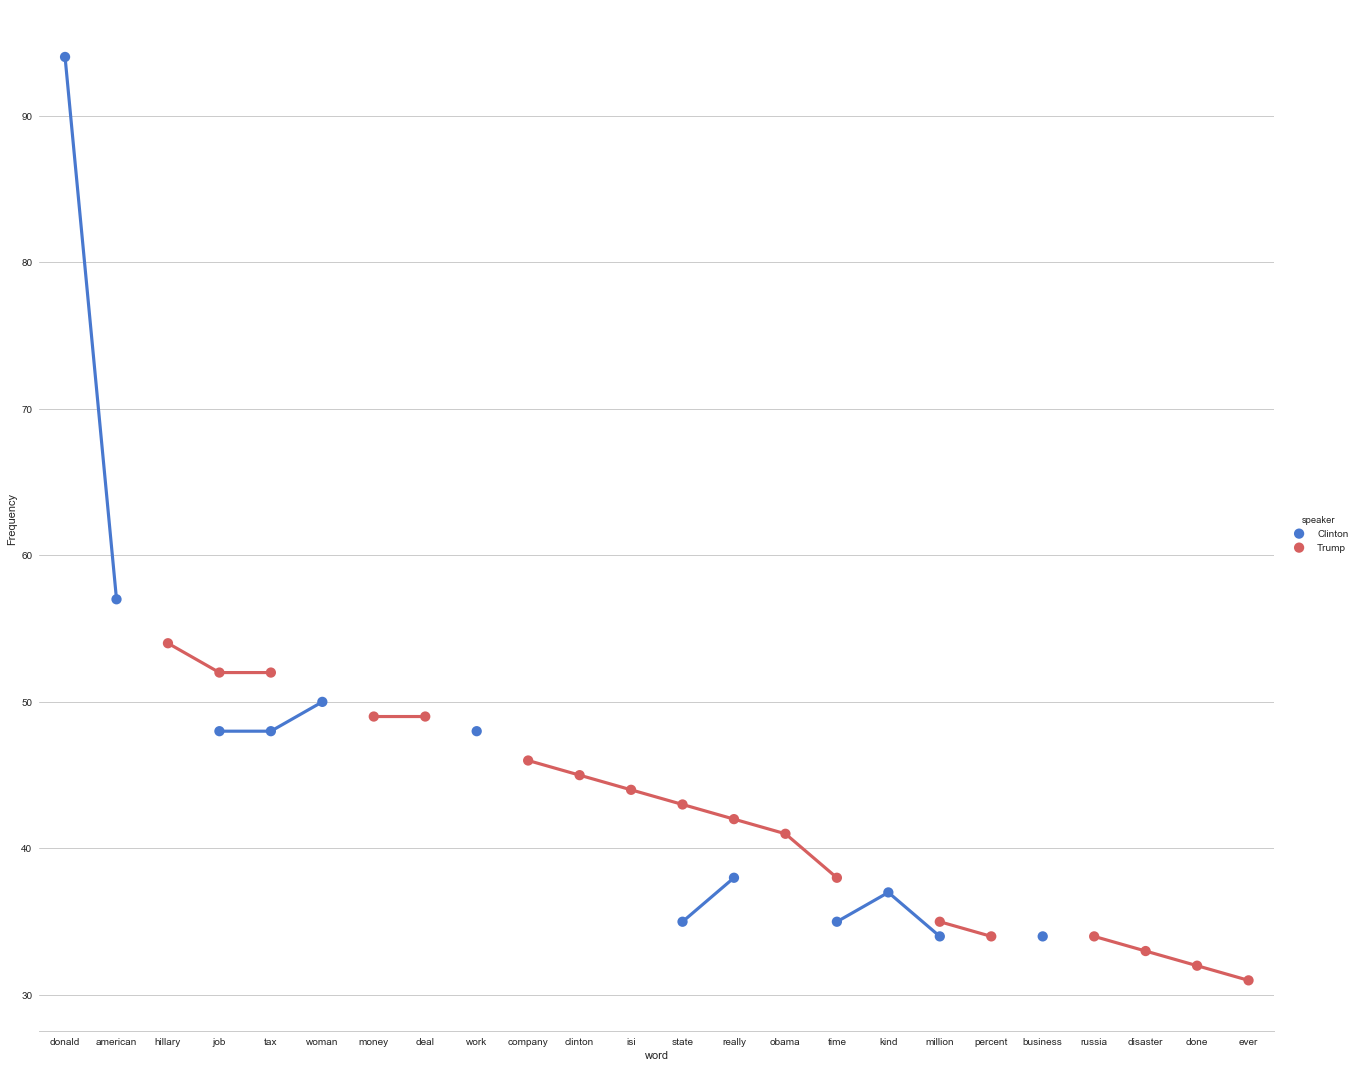

In [17]:
sns.set(style="whitegrid")

sns.color_palette(palette=None, n_colors=None, desat=None)

g = sns.factorplot(x="word", y="freq", hue="speaker", data=df4,
                   size=15, aspect=1.2,
                   palette=dict(Trump = "#D65F5F", Clinton = "#4878CF"))
g.despine(left=True)
g.set_ylabels("Frequency")

### In the next section we will explore more advanced visualization with Scattertext